In [1]:
import torch
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline

import models
from tacotron2.text import text_to_sequence

In [2]:
taco_path = '/workspace/output/checkpoint_Tacotron2_60'
wg_path = '/workspace/output/pretrained/JoC_WaveGlow_FP32_PyT_20190306'

In [3]:
taco_checkpoint = torch.load(taco_path, map_location='cpu')
wg_checkpoint = torch.load(wg_path, map_location='cpu')

In [4]:
t2 = models.get_model('Tacotron2', taco_checkpoint['config'], to_cuda=True)
wg = models.get_model('WaveGlow', wg_checkpoint['config'], to_cuda=True)

In [5]:
for model, checkpoint in [(t2, taco_checkpoint), (wg, wg_checkpoint)]:
    new_state_dict = {}
    for key, value in checkpoint['state_dict'].items():
        new_key = key.replace('module.', '')
        new_state_dict[new_key] = value

    model.load_state_dict(new_state_dict)

In [6]:
t2.eval()
wg.eval()
print('Done')

Done


In [7]:

# text1 = "bom bom"
# text2 = "kit kat"

# bombom = [39, 52, 50, 11, 39, 52, 50]
# kitkat = [48, 46, 57, 11, 48, 38, 57]

In [8]:
text = "For the great victory to the death!"

In [25]:
inputs = np.array(text_to_sequence(text, ['english_cleaners']))[None, :]
print(inputs)
inputs = torch.from_numpy(inputs).to(device='cuda', dtype=torch.int64)
#inputs = torch.from_numpy(np.array([bombom, kitkat], dtype=np.int64)).to(device='cuda', dtype=torch.int64)

#input_lengths = torch.IntTensor([inputs.size(1), inputs.size(1)]).cuda().long()
input_lengths = torch.IntTensor([inputs.size(1)]).cuda().long()
speaker_id = torch.IntTensor([0]).cuda().long()

[[43 52 55 11 57 45 42 11 44 55 42 38 57 11 59 46 40 57 52 55 62 11 57 52
  11 57 45 42 11 41 42 38 57 45  2]]


In [26]:
# print(inputs.shape)
# print(speaker_id.shape)

In [27]:
embedded_speaker = t2.speakers_embedding(speaker_id)

In [28]:
embedded_speaker

tensor([[ 0.1304, -0.0939,  0.0484,  0.1204, -0.1132,  0.0496,  0.1600, -0.1187,
          0.1122,  0.1422, -0.1403,  0.1009, -0.0744, -0.0897, -0.0940, -0.0477,
          0.1313, -0.0683,  0.0665,  0.0945,  0.0789,  0.0676,  0.0341, -0.1040,
          0.0201, -0.1661, -0.0251, -0.0223,  0.0365,  0.1334,  0.0570,  0.1191,
         -0.1441,  0.0769,  0.1136,  0.0912, -0.1111, -0.1334, -0.1236, -0.1515,
          0.1109, -0.0644, -0.0562,  0.0318,  0.1099,  0.0708, -0.1155,  0.0048,
          0.0129, -0.0793, -0.0671, -0.0546, -0.0813,  0.0762,  0.1328,  0.0646,
          0.1042, -0.1234, -0.0479,  0.1625,  0.0457, -0.0453,  0.0701,  0.0527,
          0.1567,  0.0272, -0.0306,  0.1184,  0.0326,  0.0272, -0.1529, -0.0218,
         -0.0240,  0.0998, -0.1264,  0.0942,  0.0723,  0.0396,  0.0234,  0.0197,
         -0.0007, -0.0648,  0.0569, -0.0145,  0.1596,  0.0969, -0.1287,  0.0213,
         -0.0876,  0.0385, -0.0978,  0.0618,  0.0841,  0.1466,  0.0665, -0.0461,
          0.1648,  0.0456,  

In [29]:
# embedded_speaker

In [30]:
input_lengths

tensor([35], device='cuda:0')

In [31]:
# embedded_speaker

In [32]:
# with torch.no_grad():
#     speaker_id = speaker_id.unsqueeze(1)
#     print(speaker_id)
#     embedded_speaker = t2.speakers_embedding(speaker_id)
#     embedded_speaker = embedded_speaker.repeat(1, input_lengths, 1)
#     print(embedded_speaker.shape)
#     embedded_inputs = t2.symbols_embedding(inputs).transpose(1, 2)
#     torch.save(embedded_inputs, 'kitkat_se.pt')
#     encoder_outputs = t2.encoder(embedded_inputs, input_lengths)
#     torch.save(encoder_outputs, 'kitkat_eo.pt')
#     merged_outputs = torch.cat([encoder_outputs, embedded_speaker], -1)
#     print(merged_outputs.shape)
    
    
#     mel_outputs, gate_outputs, alignments = t2.decoder.infer(
#             merged_outputs)
#     print(mel_outputs.shape)

In [33]:
# embedded_inputs[1]

In [34]:
# bombom_emb = torch.load('bombom_se.pt')
# bombom_eo  = torch.load('bombom_eo.pt')
# kitkat_emb = torch.load('kitkat_se.pt')
# kitkat_eo  = torch.load('kitkat_eo.pt')

In [35]:
# kitkat_eo

In [36]:
# encoder_outputs[0]

In [37]:
with torch.no_grad():
    print(speaker_id)
    _, mel, _, _ = t2.infer(inputs, speaker_id)
    print(mel.shape)
    audio = wg.infer(mel)

tensor([0], device='cuda:0')
torch.Size([1, 80, 216])


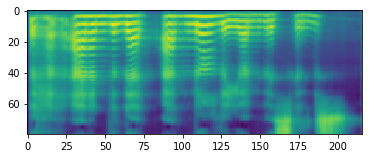

In [38]:
plt.imshow(mel.squeeze(0).detach().cpu().numpy())

In [39]:
audio_numpy = audio[0].data.cpu().numpy()
rate = 22050

In [40]:
Audio(audio_numpy, rate=rate)

## Mels from disk

In [185]:
import torch

In [186]:
mels = torch.load('file.pt')

In [187]:
mels.shape

torch.Size([2, 80, 747])

In [193]:
mel = mels[1].unsqueeze(0)[:, :, :450]

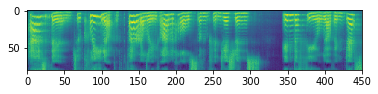

In [194]:
plt.imshow(mel.squeeze(0).detach().cpu().numpy())

In [195]:
with torch.no_grad():
    audio = wg.infer(mel)

In [196]:
audio_numpy = audio[0].data.cpu().numpy()
rate = 22050

In [197]:
Audio(audio_numpy, rate=rate)

In [ ]:
import torch
waveglow = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_waveglow')

In [ ]:
import numpy as np
from scipy.io.wavfile import write

In [ ]:
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to('cuda')
waveglow.eval()

In [ ]:
tacotron2 = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_tacotron2')
tacotron2 = tacotron2.to('cuda')
tacotron2.eval()

In [ ]:
text = "There is also this workaround in case you want to change the size without using the figure environment."

In [ ]:
sequence = np.array(tacotron2.text_to_sequence(text, ['english_cleaners']))[None, :]
sequence = torch.from_numpy(sequence).to(device='cuda', dtype=torch.int64)
input_lengths = torch.IntTensor([sequence.size(1)]).cuda().long()

In [ ]:
with torch.no_grad():
    inputs = tacotron2.parse_input(sequence)
    print(inputs.shape)
    embedded_inputs = tacotron2.embedding(inputs).transpose(1, 2)
    print(embedded_inputs.shape)
    encoder_outputs = tacotron2.encoder.inference(embedded_inputs)
    print(encoder_outputs.shape)
    mel_outputs, gate_outputs, alignments = tacotron2.decoder.inference(
            encoder_outputs)
    print(mel_outputs.shape)

In [ ]:
a,b,c,d = tacotron2.infer(sequence)

In [ ]:
b

In [ ]:

# run the models
with torch.no_grad():
    _, mel, _, _ = tacotron2.infer(sequence)
    audio = waveglow.infer(mel)
audio_numpy = audio[0].data.cpu().numpy()
rate = 22050

In [ ]:
from IPython.display import Audio
Audio(audio_numpy, rate=rate)

In [ ]:
mel.shape

In [ ]:
# Bom bom
# [[39 52 50 11 39 52 50]]
# kit kat
# [[48 46 57 11 48 38 57]]

